In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tqdm,sys
sys.path.append('../')
import model as ez

Choose parameters

In [13]:
# Set parameters
# Size of domain
Nx = 100
Ny = 20

# Average lattice sites hopped over by grain in motion
skipmax = 3

# Collision entrainment probability
c_0 = 333.333

# Random fluid entrainment
f = 0.0

# Initial perturbations
initial = 0.0

# Mask to prevent periodic boundary conditions? 
mask_index=None

# Grain deposition scaling in z
zfactor=2000

# Initial bed height (uniform)
bed_h = 50

# Fluid feedback
fb = 0.3

# Initial slope:
slope = 0.0

# Main input parameter: number of grains dropped at one end of the domain per time step.
q_in = 5

Initialize run

In [14]:
run = ez.set_q(Nx,Ny,c_0,f,q_in,skipmax=skipmax,initial=initial,slope=slope,zfactor=zfactor,bed_h = bed_h,mask_index=mask_index,fb=fb)

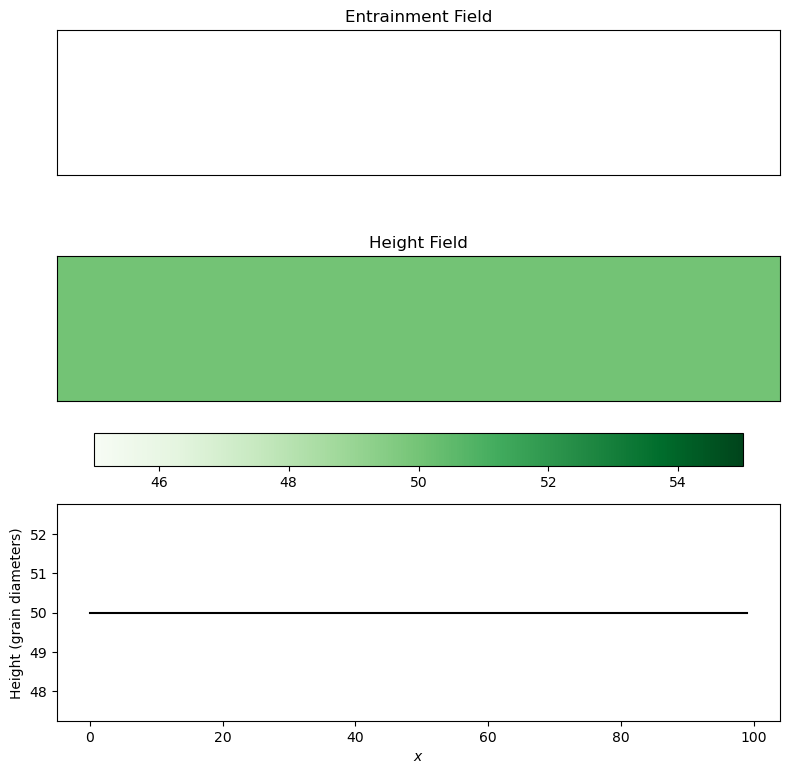

In [15]:
# Check initial conditions
run.plot_min()

Time-stepping loop

In [16]:
odata = []
profiles = []

T = 5000
for ii in tqdm.tqdm(range(T)):
    # Print out time-series data
    odata.append(run.get_scalars())
    # Step
    run.step()

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:29<00:00, 169.58it/s]


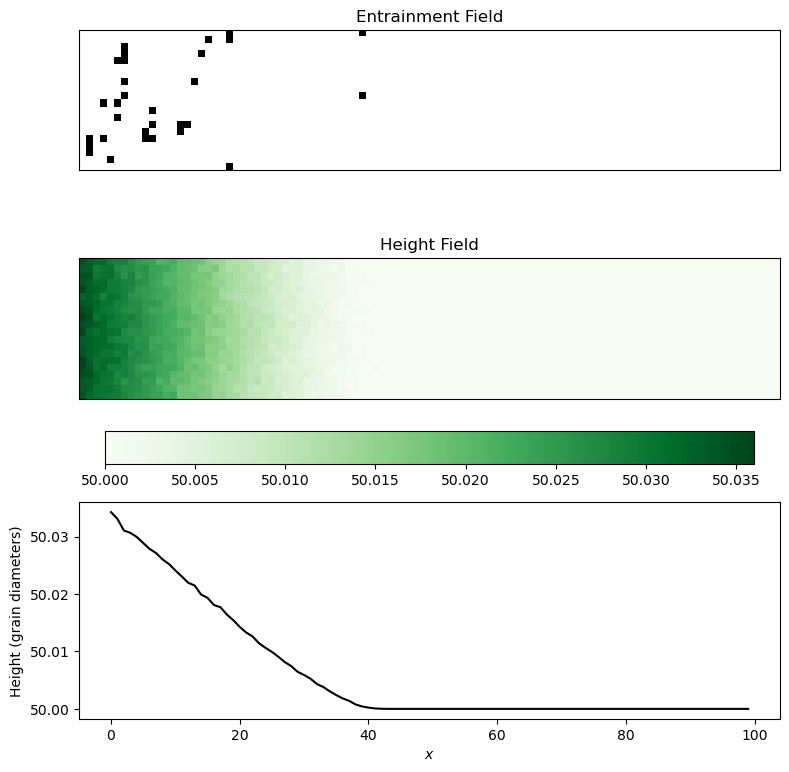

In [17]:
# Plot final state
run.plot_min()

Plot time-series

In [18]:
help(run.get_scalars)

Help on method get_scalars in module model:

get_scalars() method of model.set_q instance
    Get scalar outputs of model: returns [tstep, bed_activity,q_mid,e_mid,e_last,q_out]



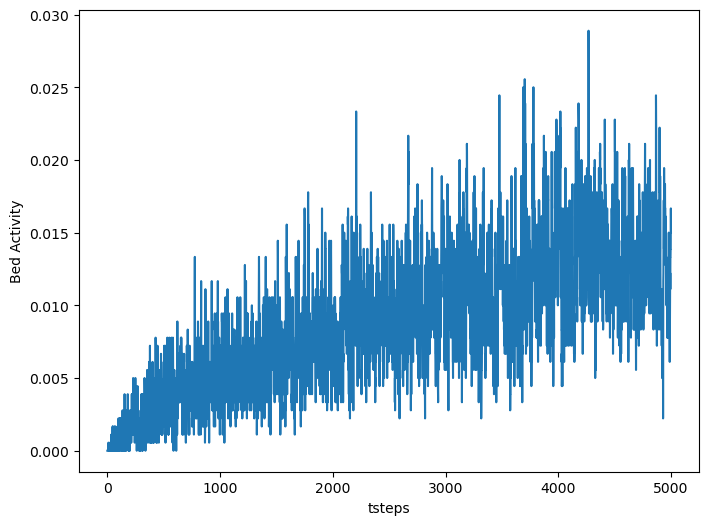

In [19]:
odata = np.array(odata)
tstep = odata[:,0]
bed_activity = odata[:,1]

plt.figure(figsize=(8,6))
plt.plot(tstep,bed_activity)
plt.xlabel('tsteps')
plt.ylabel('Bed Activity')
plt.show()